In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(13)

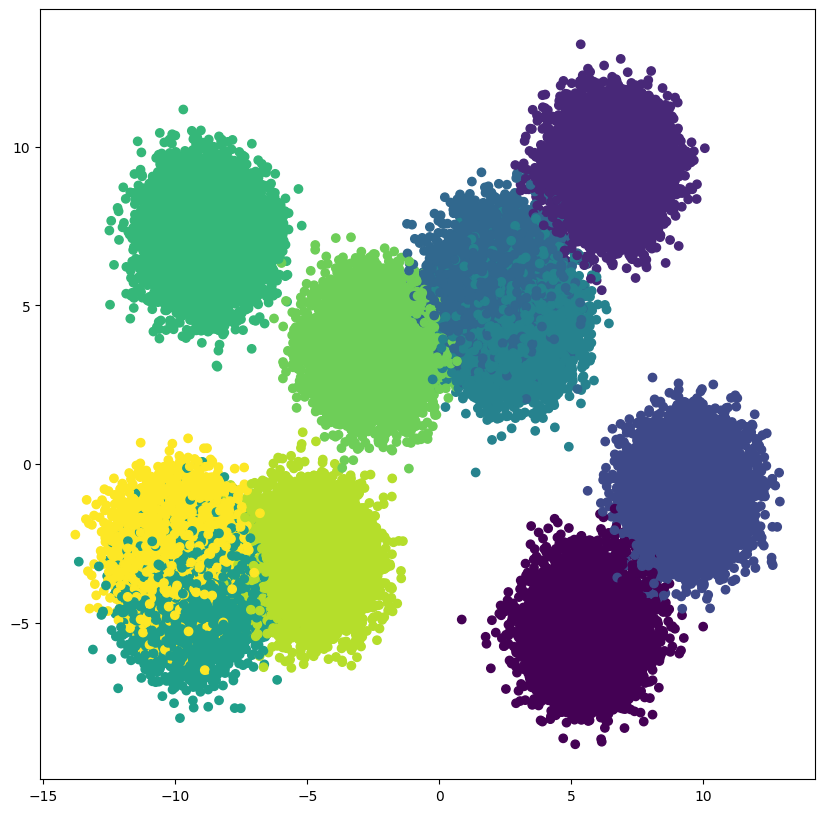

In [2]:
X, yhat = make_blobs(centers=10, n_samples=100000)
fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.show()

In [3]:
yhat = yhat[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, yhat)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 2), (25000, 2), (75000, 1), (25000, 1))

0.71332


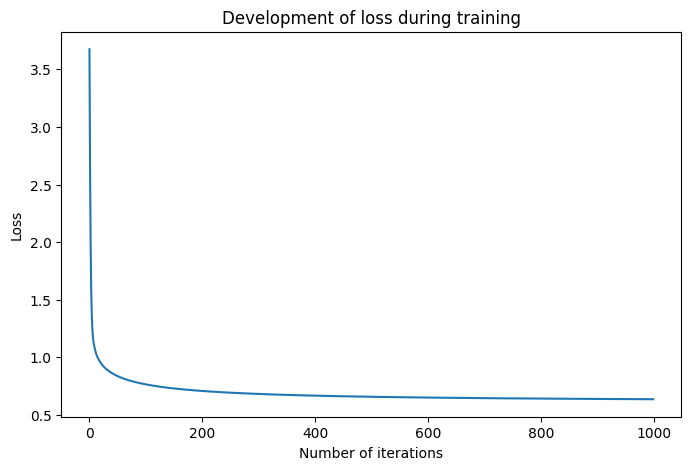

In [5]:
def load_dataset(file_path):
    dataMat = []
    labelMat = []
    fr = open(file_path)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat


def train(data_arr, label_arr, n_class, iters = 1000, alpha = 0.1, lam = 0.01):
    '''
    @description: softmax 训练函数
    @param {type} 
    @return: theta 参数
    '''    
    n_samples, n_features = data_arr.shape
    n_classes = n_class
    # 随机初始化权重矩阵
    weights = np.random.rand(n_class, n_features)
    # 定义损失结果
    all_loss = list()
    # 计算 one-hot 矩阵
    y_one_hot = one_hot(label_arr, n_samples, n_classes)
    for i in range(iters):
        # 计算 m * k 的分数矩阵
        scores = np.dot(data_arr, weights.T)
        # 计算 softmax 的值
        probs = softmax(scores)
        # 计算损失函数值
        loss = - (1.0 / n_samples) * np.sum(y_one_hot * np.log(probs))
        all_loss.append(loss)
        # 求解梯度
        dw = -(1.0 / n_samples) * np.dot((y_one_hot - probs).T, data_arr) + lam * weights
        dw[:,0] = dw[:,0] - lam * weights[:,0]
        # 更新权重矩阵
        weights  = weights - alpha * dw
    return weights, all_loss
        

def softmax(scores):
    # 计算总和
    sum_exp = np.sum(np.exp(scores), axis = 1,keepdims = True)
    softmax = np.exp(scores) / sum_exp
    return softmax


def one_hot(label_arr, n_samples, n_classes):
    one_hot = np.zeros((n_samples, n_classes))
    one_hot[np.arange(n_samples), label_arr.T] = 1
    return one_hot


def predict(test_dataset, label_arr, weights):
    scores = np.dot(test_dataset, weights.T)
    probs = softmax(scores)
    return np.argmax(probs, axis=1).reshape((-1,1))


if __name__ == "__main__":
    data_arr = np.array(X_train)
    label_arr = np.array(y_train).reshape((-1,1))
    weights, all_loss = train(data_arr, label_arr, n_class = 10)

    # 计算预测的准确率
    test_data_arr = np.array(X_test)
    test_label_arr = np.array(y_test).reshape((-1,1))
    n_test_samples = test_data_arr.shape[0]
    y_predict = predict(test_data_arr, test_label_arr, weights)
    accuray = np.sum(y_predict == test_label_arr) / n_test_samples
    print(accuray)

    # 绘制损失函数
    fig = plt.figure(figsize=(8,5))
    plt.plot(np.arange(1000), all_loss)
    plt.title("Development of loss during training")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.show()

In [6]:
label = []
for i in range(10):
    label.append(i)
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
for i in range(len(label)):
    if i % 2 == 0:
        label[i] = 0
    else:
        label[i] = 1
label = np.array(label)
label

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [8]:
one_hot = np.zeros((10, 2))
one_hot[np.arange(10), label.T] = 1

In [9]:
one_hot

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])